In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 

<img src=normal.png width=500>

In [2]:
sp.norm(78, 1).pdf(90)

2.1463837356630605e-32

(180, 187, 3)
9
255
19
9.0
255.0
19.0
0.3520653267642995


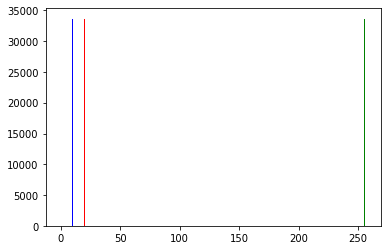

In [3]:
#학습code
train = cv2.imread("patch3.png")    
print(train.shape)
b,g,r = cv2.split(train)
hb = plt.hist(b.ravel(), 256, [0,256], color='b') 
hg = plt.hist(g.ravel(), 256, [0,256], color='g') 
hr = plt.hist(r.ravel(), 256, [0,256], color='r') 
maxb = (np.where( hb[0] == np.max(hb[0])) )[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])) )[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])) )[0][0]
print(maxb)
print(maxg)
print(maxr)

print(np.mean(b))
print(np.mean(g))
print(np.mean(r))

t =7
p=sp.norm(0,1).pdf((9-7)/4)
print(p)

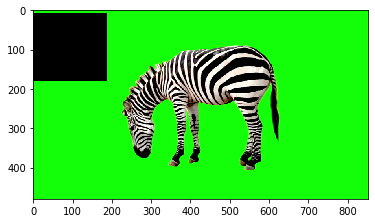

In [4]:
test = cv2.imread("zoo.jpg")
for r in range(train.shape[0]) :
    for c in range(train.shape[1]) :        
        if  np.array_equal (test[r,c,:], [maxb, maxg, maxr]) :
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) )   

<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.int32'>


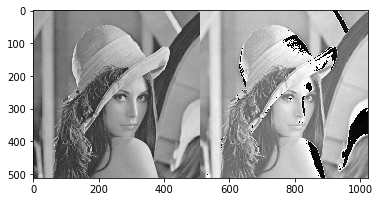

In [5]:
img=cv2.imread("lena.png",cv2.IMREAD_GRAYSCALE)
print(type(img))
print(type(img[0,0]))
imgint=np.array(img, dtype='int')
print(type(imgint[0,0]))
img2=img+50

plt.imshow(np.hstack([img,img2]),cmap="gray")

In [6]:
a = np.array([250,254],dtype="uint8")
b=a+10
print(b)

a = np.array([250,20,254],dtype="int")
b= 1+10
c= np.clip(b,0,255)
print(c)
d=np.array(c,dtype="uint8")
print(d)

e=[1,1.0,2]
f=np.array(e)

print(type(f[0]))

[4 8]
11
11
<class 'numpy.float64'>


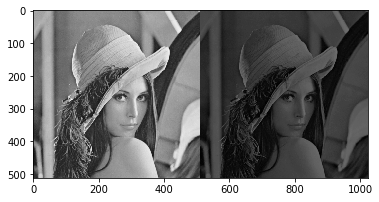

In [7]:
img2=img.astype(np.float32)
img2 *=0.5
img2=np.clip(img2,0,255).astype(np.uint8)
# img2=img2.astype(np.uint8)

plt.imshow(np.hstack([img,img2]) ,cmap="gray")

In [8]:
lut1=[x for x in range(10)]
print(lut1)

lut2=[x+5 for x in range(10)]
print(lut2)

lut3=np.clip(lut2,5,9)
print(lut3)

lut4=[x+5 if x+5 <=9 else 9 for x in range(10)]
print(lut4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5 6 7 8 9 9 9 9 9 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]


[[202 202 201 ... 210 194 165]
 [202 202 201 ... 210 194 165]
 [202 202 201 ... 210 194 165]
 ...
 [ 63  63  70 ... 138 134 136]
 [ 63  63  76 ... 140 141 146]
 [ 63  63  76 ... 140 141 146]]


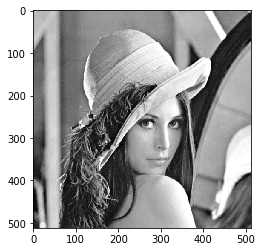

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [106 106 118 ... 230 224 228]
 [106 106 128 ... 234 236 244]
 [106 106 128 ... 234 236 244]]


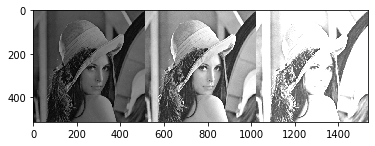

In [9]:
def mullut(op):
    return np.array([x*op if x*op <255 else 255
            for x in range(256)]).astype("uint8")
src2=cv2.LUT(img ,mullut(1.2))
print(src2)
plt.imshow(src2, cmap="gray")
plt.show()
src3=cv2.LUT(img ,mullut(2.0))
print(src3)
plt.imshow(src3, cmap="gray")

all = np.hstack([cv2.LUT(img, mullut(0.7)),cv2.LUT(img, mullut(1.2)),cv2.LUT(img, mullut(2.0))])
plt.imshow(all ,cmap="gray")


[[140 140 142 ... 127 155 208]
 [140 140 142 ... 127 155 208]
 [140 140 142 ... 127 155 208]
 ...
 [139 139 126 ...   3   9   5]
 [139 139 115 ... 254 252 243]
 [139 139 115 ... 254 252 243]]


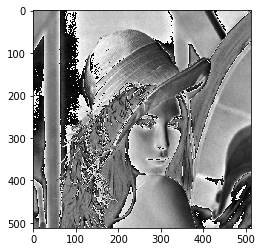

In [10]:
def negativelut(op):
    return np.array([x*(255-op) for x in range(256)]).astype("uint8")

src2=cv2.LUT(img ,negativelut(1.2))
print(src2)
plt.imshow(src2, cmap="gray")
plt.show()



[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


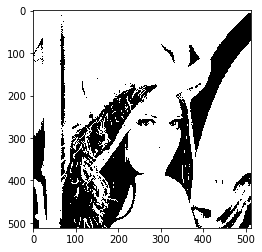

In [11]:
def binarylut(t):
    return np.array([(x > t)*255 for x in range(256)]).astype("uint8")

src2=cv2.LUT(img ,binarylut(100))
print(src2)
plt.imshow(src2, cmap="gray")
plt.show()


[[160 160 160 ... 170 160 130]
 [160 160 160 ... 170 160 130]
 [160 160 160 ... 170 160 130]
 ...
 [ 50  50  50 ... 110 110 110]
 [ 50  50  60 ... 110 110 120]
 [ 50  50  60 ... 110 110 120]]


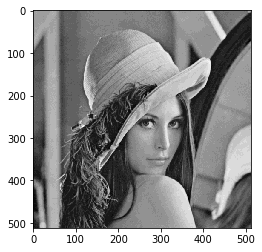

In [12]:
def posterlut(t):
    return np.array([int(x/t)*t for x in range(256)]).astype("uint8")

src2=cv2.LUT(img ,posterlut(10))
print(src2)
plt.imshow(src2, cmap="gray")
plt.show()


[[244 244 244 ... 245 243 239]
 [244 244 244 ... 245 243 239]
 [244 244 244 ... 245 243 239]
 ...
 [217 217 220 ... 235 234 235]
 [217 217 222 ... 235 236 236]
 [217 217 222 ... 235 236 236]]


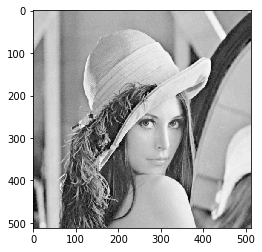

In [13]:
def gammalut(gamma) :
    invGamma = 1.0 / gamma
    return np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

src2=cv2.LUT(img ,gammalut(10))
print(src2)
plt.imshow(src2, cmap="gray")
plt.show()

(512, 512)
(512, 512, 3)


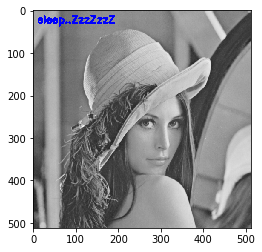

In [14]:
img=cv2.imread("lena.png",cv2.IMREAD_GRAYSCALE)
print(img.shape)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(col.shape)

cv2.putText(col,"sleep..ZzzZzzZ",(10,30),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),3)

plt.imshow(col)

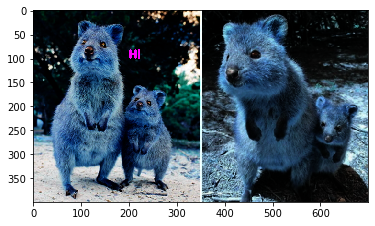

In [15]:
img=cv2.imread("Quo.jpg")

col = cv2.LUT(img, gammalut(0.5))
cv2.putText(col,"HI",(200,100),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,255),3)

plt.imshow(col)

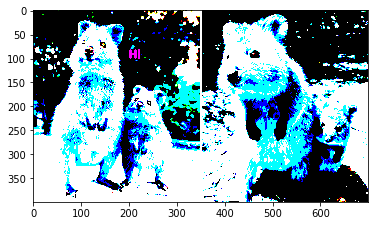

In [16]:
img=cv2.imread("Quo.jpg")

col = cv2.LUT(img, binarylut(100))
cv2.putText(col,"HI",(200,100),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,255),3)

plt.imshow(col)

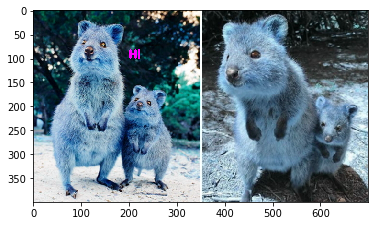

In [17]:
img=cv2.imread("Quo.jpg")
src2=cv2.LUT(img ,posterlut(1))
cv2.putText(src2,"HI",(200,100),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,255),3)

plt.imshow(src2)




In [18]:
img=cv2.imread("Quo.jpg")
src2=cv2.LUT(img ,negativelut(0))
cv2.putText(src2,"HI",(200,100),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,255),3)
cv2.imwrite




<function imwrite>

In [19]:
img=cv2.imread("Quo.jpg")
gm = [0.5, 1.2, 2.5, 3.0]
for i in range(len(gm)) :
    col = cv2.LUT(img, gammalut(gm[i]))
    cv2.putText(col, f"gamma={gm[i]}", (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
    cv2.imwrite(f"g{i+1}.jpg", np.hstack([img, col]))
    


In [23]:
from PIL import Image
im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

im1.save("out3.gif", save_all=True, append_images=[im2, im3, im4],
         duration=500, loop=1)

<h1>Hello</h1>
<img src=out3.gif?3443>

In [3]:
img=cv2.imread("Quo.jpg")

k=3
kernel= np.ones((k,k),np.float32)/(k*k)
print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


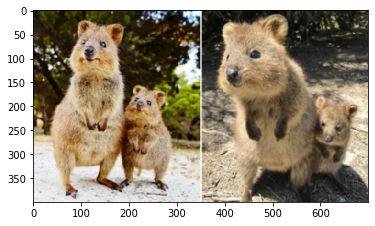

In [7]:
filtered = cv2.filter2D(img,-1,kernel)
plt.imshow(cv2.cvtColor(filtered,cv2.cv2.COLOR_BGR2RGB))